In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading data
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [3]:
# Preview data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking dimension of datatse
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 205 rows and 26 columns


In [5]:
# Checking basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Categorical features
cat_features = [cat for cat in df.columns if df[cat].dtype == 'O']
print(f"The dataset has total {len(cat_features)} categorical attributes")

The dataset has total 10 categorical attributes


In [7]:
# Numerical features
num_features = [num for num in df.columns if df[num].dtype != 'O']
print(f"The dataset has total {len(num_features)} numerical attributes")

The dataset has total 16 numerical attributes


In [8]:
# Descriptive statistic analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [9]:
# Checking fro missing values in dataset
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# Checking for duplicate values
df[df.duplicated()].sum()

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

**Data Cleaning**

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
# Checking for unique Car Name
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
# Creating function to replace value in carname attributes
def replace(a,b):
    df['CarName'].replace(a,b,inplace=True)
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [17]:
# Checking for unique Car Name
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

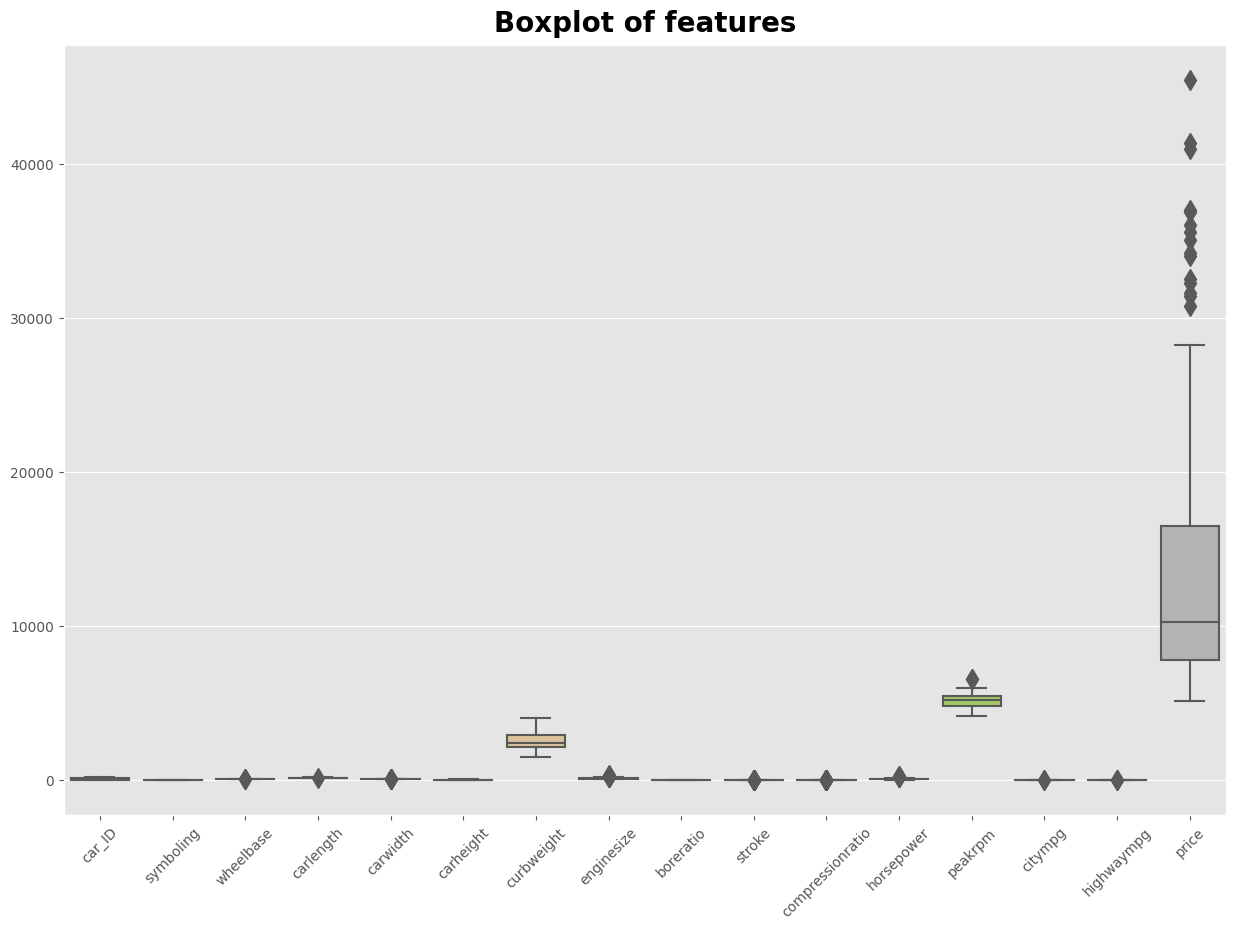

In [18]:
# Checking for outliers
plt.figure(figsize=(15,10))
sns.boxplot(df,palette="Set2",width=0.8,fliersize=10)
plt.title('Boxplot of features', pad=10, fontweight="black", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [19]:
z = round(df.groupby(["CarName"])["price"].agg(["mean"]),2).T
z

CarName,Nissan versa,alfa-romero Quadrifoglio,alfa-romero giulia,alfa-romero stelvio,audi 100 ls,audi 100ls,audi 4000,audi 5000,audi 5000s (diesel),audi fox,...,volkswagen type 3,volvo 144ea,volvo 145e (sw),volvo 244dl,volvo 245,volvo 246,volvo 264gl,volvo diesel,vw dasher,vw rabbit
mean,5499.0,16500.0,13495.0,16500.0,13950.0,17580.0,23875.0,18920.0,17859.17,15250.0,...,8195.0,16230.0,14892.5,18735.0,16515.0,22470.0,20522.5,18950.0,11595.0,9980.0


In [20]:
df = df.merge(z.T,how="left",on="CarName")

In [21]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,13495.0,Medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,16500.0,Medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,16500.0,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,13950.0,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,17580.0,Medium


In [22]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [23]:
new_df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,ohc,four,mpfi,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0,Medium
201,gas,turbo,four,sedan,rwd,ohc,four,mpfi,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0,Medium
202,gas,std,four,sedan,rwd,ohcv,six,mpfi,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0,Medium
203,diesel,turbo,four,sedan,rwd,ohc,six,idi,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0,Highend


In [24]:
# Creating Dummies Variables for all the Categorical Features.
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [25]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,1,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
# As we know that our dataset has some outliers so we do scaling of numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [27]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,...,0,0,0,0,1,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,...,0,0,0,0,1,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,...,0,0,0,0,1,0,0,0,1,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,...,0,0,0,0,1,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# Segregating data into independent and dependent features
X = new_df.drop(columns=["price"])
y = new_df["price"]

In [29]:
# Train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# model training
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [31]:
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
y_pred = random_forest.predict(X_test)

In [33]:
# Model Evaluation
from sklearn.metrics import r2_score
print('R2 score: ',r2_score(y_test,y_pred)*100)

R2 score:  91.24741251914334


In [34]:
# Model Testing
new_data = X_test.loc[100].values

In [35]:
random_forest.predict([new_data])[0]

8984.54